In [5]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

In [38]:
X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets=1, noise = 20)

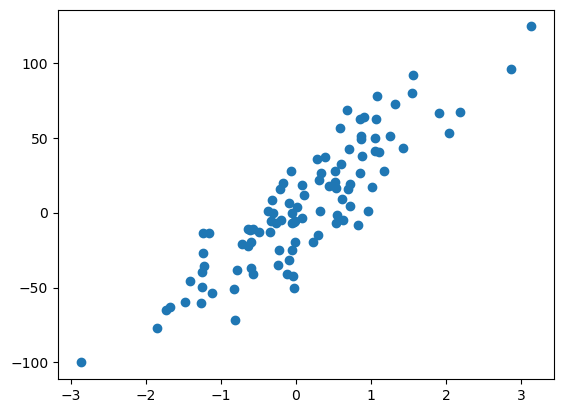

In [39]:
plt.scatter(X,y)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[37.42437462]
0.08276068543300052


In [43]:
m = 37.42

In [ ]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.m = m
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    # calculate the b using GD
    for i in range(self.epochs):
      loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
      self.b = self.b - (self.lr * loss_slope)
      print(loss_slope,self.b)
    print(self.b)

In [73]:
gd = GDRegressor(0.001,1000)

In [72]:
gd.fit(X,y)

-24016.665545105592 -95.9833344548944
-19213.332436084474 -76.77000201880993
-15370.665948867578 -61.39933606994236
-12296.532759094065 -49.102803310848294
-9837.22620727525 -39.265577103573044
-7869.7809658202 -31.395796137752843
-6295.82477265616 -25.099971365096682
-5036.659818124927 -20.063311546971754
-4029.327854499942 -16.03398369247181
-3223.4622835999535 -12.810521408871857
-2578.7698268799627 -10.231751581991894
-2063.01586150397 -8.168735720487923
-1650.412689203176 -6.518323031284748
-1320.330151362541 -5.197992879922206
-1056.264121090033 -4.141728758832173
-845.0112968720259 -3.2967174619601467
-676.0090374976209 -2.620708424462526
-540.8072299980968 -2.079901194464429
-432.6457839984774 -1.6472554104659516
-346.11662719878194 -1.3011387832671697
-276.8933017590256 -1.024245481508144
-221.5146414072206 -0.8027308401009234
-177.21171312577633 -0.6255191269751471
-141.76937050062097 -0.4837497564745261
-113.41549640049682 -0.3703342600740293
-90.7323971203974 -0.27960186295

### Adding the slope 'm' along with the intercept 'b'

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)

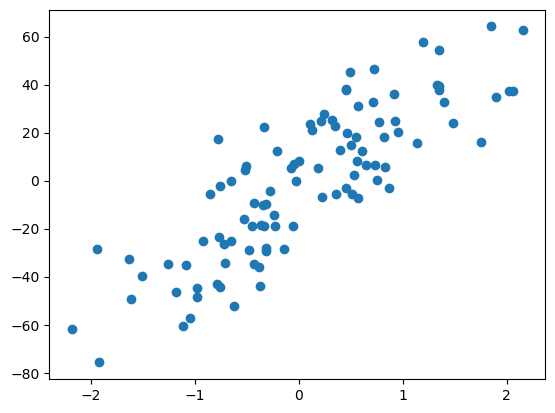

In [3]:
plt.scatter(X,y)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [41]:
y_pred = lr.predict(X_test)

In [43]:
r2_score(y_test,y_pred)

0.6345158782661012

In [32]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    # calculate the b and m using GD formula 
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
      loss_slope_m  = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)

    print(self.m,self.b)

  def predict(self, X):
    return self.m * X + self.b

In [33]:
gd = GDRegressor(0.001, 50)


In [45]:
gd.fit(X_train,y_train)


28.125973288614077 -2.2710144129477814


In [48]:
y_pred = gd.predict(X_test)

In [49]:
r2_score(y_test,y_pred)

0.6345158783759985

In [52]:
b = 150
m = -127
lr = 0.001
all_b=  []
all_m = []
all_cost = []

epochs = 50

for i in range(epochs):
  slope_b = 0
  slope_m = 0
  cost = 0
  for j in range(X.shape[0]):
    slope_b = slope_b - 2 * (y[j] - (m * X[j]) - b)
    slope_m = slope_m - 2 * (y[j] - (m * X[j]) - b) * X[j]
    cost = cost + (y[j] - m * X[j] - b)**2

  b = b - (lr*slope_b)
  m = m - (lr * slope_m)

  all_b.append(b)
  all_m.append(m)
  all_cost.append(cost)

In [55]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [66]:
fig, ax = plt.subplots(figsize = (9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i * (-27) - 150
ax.scatter(X,y)
line, =ax.plot(x_i, x_i * 50 - 4, 'r-',linewidth = 2)

def update(i):
  label = 'epoch{0}'.format(i + 1)
  line.set_ydata(x_i*all_m[i] + all_b[i])
  ax.set_x_label(label)

anim = FuncAnimation(fig, update, repeat = True, frames =epochs, interval = 500)

# f = r"animation4.gif"
# writergif = animation.PillowWriter(fps = 2)
# anim.save(f,writer = writergif)

<IPython.core.display.Javascript object>